# Momento de Retroalimentación: Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.
**Elaborado por Marcelo Márquez Murillo - A01720588, para la clase TC3006C.101**

**Dataset**
*Diabetes Healthcare: Comprehensive Dataset*
El Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales (NIDDK), es una institución dedicada a la investigación y desarrollo de tratamientos médicos para enfermedades crónicas. Con el propósito de avanzar en la comprensión y predicción de pacientes propensos a padecer diabetes, han establecido una base de datos que recopila información de salud de diversos pacientes, así como su estado de salud en relación con la diabetes. Esta base de datos se emplea para entrenar un modelo de Aprendizaje Automático (Machine Learning) con el fin de mejorar la precisión de los diagnósticos relacionados con esta enfermedad.

**Cantidad de registros: 768**
La base de datos contiene la siguiente información por paciente:
* Variables independientes
* Pregnancies - número de veces que la paciente se haya embarazado.
* Glucose - concentración de glucosa en el cuerpo del paciente.
* BloodPressure - Presión arterial del paciente.
* SkinThickness - Grosor del pliegue cutáneo del tríceps.
* Insulin - Suero de insulina.
* BMI - Body Mass Index (Índice de masa corporal).
* DiabetesPedigreeFunction - Función del pedigrí de la diabetes
* Age - Edad del paciente.
* Variable dependiente
* Outcome - Variable de clase binaria, 1 representa que el paciente tiene diabetes y 0 significa que no tiene diabetes.

Link al dataset: https://www.kaggle.com/datasets/deependraverma13/diabetes-healthcare-comprehensive-dataset?datasetId=3546399&sortBy=voteCount  
Este dataset tiene la licencia: *Database Contents License (DbCL) v1.0*


**Modelo utilizado**
La elección del modelo de regresión logística múltiple (clasificación binaria) se fundamenta en su capacidad para manejar eficazmente variables dependientes de naturaleza binaria, como es el caso de nuestro "Outcome" que indica la presencia o ausencia de diabetes. Además, este modelo es especialmente apto para interpretar relaciones complejas entre múltiples variables independientes numéricas, como las que se presentan en nuestro conjunto de datos. La regresión logística múltiple no solo proporciona una métrica de probabilidad para la clasificación, sino que también permite una comprensión más profunda de las interacciones entre las variables, lo cual es crucial para la toma de decisiones médicas basadas en datos. Este enfoque se alinea con el objetivo de mejorar la precisión diagnóstica en el ámbito de la atención sanitaria para la diabetes.


**Métricas a utilizar**
* Matriz de confusión: Una tabla que muestra las cuatro posibles combinaciones de resultados predichos y reales.
    - Verdaderos Positivos (VP): Casos positivos correctamente identificados por el modelo.
    - Falsos Positivos (FP): Casos negativos incorrectamente identificados como positivos.
    - Verdaderos Negativos (VN): Casos negativos correctamente identificados por el modelo.
    - Falsos Negativos (FN): Casos positivos incorrectamente identificados como negativos.
* Exactitud (*Accuracy*): Indica el porcentaje de predicciones correctas del total de predicciones.
* Precisión (*Precision*): De todas las predicciones positivas que realizó el modelo, muestra el porcentaje que fueron correctas.
* Sensibilidad (*Recall*): De todos los casos positivos reales, muestra el porcentaje que el modelo logró identificar correctamente.
* Puntaje F1 (*F1 Score*): Es el promedio armónico entre la precisión y la sensibilidad, ofreciendo un balance entre ambas métricas.

Cada una de estas métricas ofrece una perspectiva diferente sobre el rendimiento del modelo, y juntas brindan una visión comprensiva de cómo está funcionando el modelo en diferentes aspectos. Es importante considerar todas estas métricas para obtener una comprensión completa del rendimiento del modelo.

In [2]:
# Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

In [3]:
# Leemos el archivo "health_care_diabetes.csv"
df = pd.read_csv("health_care_diabetes.csv")

Modificamos los datos faltantes en las columnas "Glucose", "BloodPressure", "SkinThickness", "Insulin" y "BMI"

In [4]:
# Utilizamos la media sin ceros en los valores faltantes de las columnas especificadas
mean_glucose = df[df["Glucose"] != 0]["Glucose"].mean()
df["Glucose"].replace(0, mean_glucose, inplace=True)
mean_blood_pressure = df[df["BloodPressure"] != 0]["BloodPressure"].mean()
df["BloodPressure"].replace(0, mean_blood_pressure, inplace=True)
mean_skin_thickness = df[df["SkinThickness"] != 0]["SkinThickness"].mean()
df["SkinThickness"].replace(0, mean_skin_thickness, inplace=True)
mean_insulin = df[df["Insulin"] != 0]["Insulin"].mean()
df["Insulin"].replace(0, mean_insulin, inplace=True)
mean_bmi = df[df["BMI"] != 0]["BMI"].mean()
df["BMI"].replace(0, mean_bmi, inplace=True)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


## Entrenamiento de los modelos

### Primer entrenamiento y predicción (Configuración 1)

Para nuestro primer intento, utilizaremos los datos ya modificados

In [7]:
# Conseguimos las variables independientes
X1 = df.drop("Outcome", axis=1)
# Conseguimos la variable dependiente
y1 = df["Outcome"]

# Dividimos los datos para tener la sección de entrenamiento y la sección de prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.6, test_size=0.4, random_state=42)
print((y1_train == 1).sum())
print((y1_train == 0).sum())

166
294


Matriz de confusión:


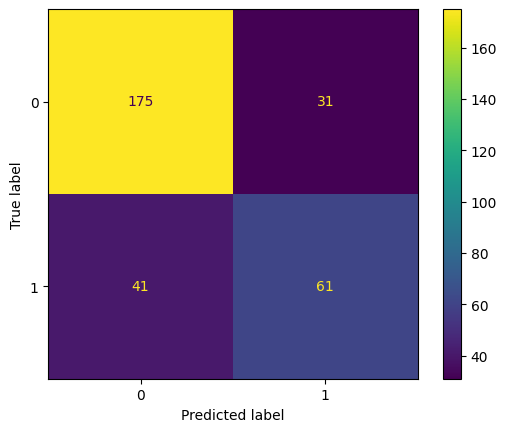

Métricas:
Accuracy score: 0.77
Precision score: 0.66
Recall score: 0.6
F1 score: 0.63


In [8]:
model1 = LogisticRegression(max_iter=100000, solver="liblinear", random_state=42, C=1)
model1.fit(X1_train, y1_train)

y1_prediction = model1.predict(X1_test)
print("Matriz de confusión:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y1_test, y1_prediction))
disp.plot()
plt.show()
print(f"Métricas:")
print(f"Accuracy score: {round(accuracy_score(y1_test, y1_prediction), 2)}")
print(f"Precision score: {round(precision_score(y1_test, y1_prediction), 2)}")
print(f"Recall score: {round(recall_score(y1_test, y1_prediction), 2)}")
print(f"F1 score: {round(f1_score(y1_test, y1_prediction), 2)}")

### Segundo entrenamiento y predicción (Configuración 2)

Para nuestro segundo intento, utilizaremos los datos ya modificados al igual que también conseguimos la misma cantidad de clases para el entrenamiento (1 y 0), para la prueba se utilizaran todos los datos.

In [9]:
# Conseguimos las variables independientes
X2 = df.drop("Outcome", axis=1)
# Conseguimos la variable dependiente
y2 = df["Outcome"]

# Conseguimos la suma de 1s y 0s
sum_ones = (df["Outcome"] == 1).sum()
sum_zeros = (df["Outcome"] == 0).sum()
sample_total = sum_ones if sum_ones < sum_zeros else sum_zeros

# A partir de esto modificamos la df para conseguir 268 renglones con un "Outcome" de 1 y 268 de 0
df_ones = df[df["Outcome"] == 1].sample(n=sample_total)
df_zeros = df[df["Outcome"] == 0].sample(n=sample_total)
df2 = pd.concat([df_ones, df_zeros]).reset_index(drop=True)
df2 = df2.sample(frac=1, random_state=1).reset_index(drop=True)

# Conseguimos las variables independientes
X2 = df2.drop("Outcome", axis=1)
y2 = df2["Outcome"]

# Dividimos los datos para tener la sección de entrenamiento y utilizamos los datos enteros para prueba
# Utilizamos stratify para asegurar un balance de clases en ambos los datos de entrenamiento y prueba
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.5, test_size=0.5, random_state=42)
print((y2_train == 1).sum())
print((y2_train == 0).sum())

139
129


Matriz de confusión:


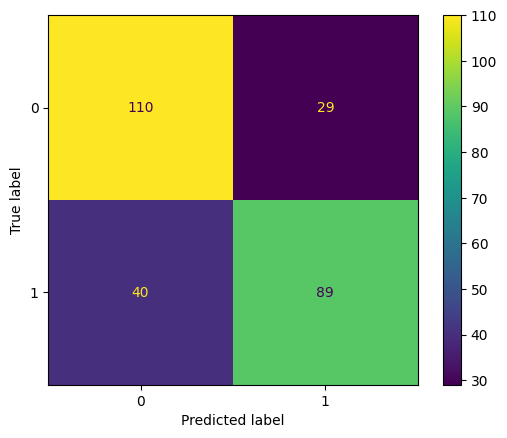

Métricas:
Accuracy score: 0.74
Precision score: 0.75
Recall score: 0.69
F1 score: 0.72


In [10]:
model2 = LogisticRegression(max_iter=100000, solver="liblinear", random_state=42, C=0.6, tol=1e-7, penalty="l1")
model2.fit(X2_train, y2_train)

y2_prediction = model2.predict(X2_test)
print("Matriz de confusión:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y2_test, y2_prediction))
disp.plot()
plt.show()
print(f"Métricas:")
print(f"Accuracy score: {round(accuracy_score(y2_test, y2_prediction), 2)}")
print(f"Precision score: {round(precision_score(y2_test, y2_prediction), 2)}")
print(f"Recall score: {round(recall_score(y2_test, y2_prediction), 2)}")
print(f"F1 score: {round(f1_score(y2_test, y2_prediction), 2)}")

### Tercer entrenamiento y predicción (Configuración 3)

Para nuestro tercer intento, utilizaremos los datos transformados

In [11]:
# Conseguimos las variables independientes
X3 = df.drop("Outcome", axis=1)
# Conseguimos la variable dependiente
y3 = df["Outcome"]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size=0.7, test_size=0.3, random_state=42, stratify=y3)

Matriz de confusión:


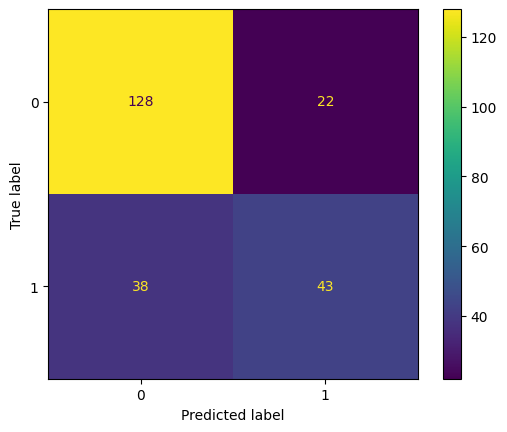

Métricas:
Accuracy score: 0.74
Precision score: 0.66
Recall score: 0.53
F1 score: 0.59


In [12]:
model3 = LogisticRegression(max_iter=1000000, solver="lbfgs", random_state=42, C=0.8, tol=1e-5)
model3.fit(X3_train, y3_train)

y3_prediction = model3.predict(X3_test)
print("Matriz de confusión:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y3_test, y3_prediction))
disp.plot()
plt.show()
print(f"Métricas:")
print(f"Accuracy score: {round(accuracy_score(y3_test, y3_prediction), 2)}")
print(f"Precision score: {round(precision_score(y3_test, y3_prediction), 2)}")
print(f"Recall score: {round(recall_score(y3_test, y3_prediction), 2)}")
print(f"F1 score: {round(f1_score(y3_test, y3_prediction), 2)}")

## Comparación de modelos y sus métricas

### Configuración 1:
* División de datos: 60% entrenamiento y 40% prueba
* Solver: Liblinear
* Regularization Strength: 1
* Max Iterations: 100,000
* Tolerance (tol): Default
* Penalty: Default (l2)

### Configuración 2:
* Division de datos: 50% entrenamiento y 50% prueba
* Solver: liblinear
* Regularization Strength: 0.5
* Max Iterations: 100,000
* Tolerance (tol): 1e-4
* Penalty: l1
* Balance de clases: Se balancearon los datos utilizando "under-sampling".

### Configuración 3:
* División de datos: 70% entrenamiento y 30%
* Solver: lbfgs
* Regularization Strength: 0.8
* Max Iterations: 1,000,000
* Tolerance (tol): 1e-5
* Penalty: Default (l2)
* Balance de clases: Se utilizó "stratify" en train_test_split para dividir los datos por la misma cantidad de 0's y 1's

### Diferencias clave:
* La división de los datos cambia por un 10% en las configuraciones (C1 - 60%, C2 - 50% y C3 - 70%), esto causa que cada modelo reciba una diferente cantidad de datos para entrenar lo cual puede afectar el rendimiento y posiblemente causar *overfitting*.
* Con solver, normalmente la más popular é útil para un dataset con pocos datos (como en nuestro caso que máximo tenemos menos de 700 renglones en X_train de cada configuración) el uso de "liblinear" pero "lbfgs" también funciona por la cantidad de datos como mencionado. 
* Cada configuración utilizó un diferente valor de Fuerza de Regulación (C1 - 1, C2 - 0.6 y C3 - 0.8), en el caso de C2, el tener un valor más chico puede ayudar contra un caso de *overfitting*.
* Con la tolerancia, el cual determina el criterio de parada para el algoritmo, también tiene valores diferentes por configuración (C1 - 1e-4, C2 - 1e-7, 1e-5), tener una tolerancia más baja (como C2 y C3) puede ayudar dado a la poca cantidad de datos que tienen.
*  Ambos C1 y C3 utilizan un *penalty* default de l2 (Regulación Ridge) mientras que el C3 es l1 (Regulación Lasso). El uso de l1 para la C2 apoya con prevenir *overfitting*. 

In [13]:
model2.get_params()

{'C': 0.6,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 1e-07,
 'verbose': 0,
 'warm_start': False}